In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Binary classification: Filter digits 0 and 1
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
optimizers = {'SGD': SGD(learning_rate=0.01), 'Adam': Adam(learning_rate=0.01), 'RMSprop': RMSprop(learning_rate=0.01)}
history = {}

for opt_name, opt in optimizers.items():
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    print(f"Training with {opt_name}...")
    history[opt_name] = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)


Training with SGD...
Training with Adam...
Training with RMSprop...


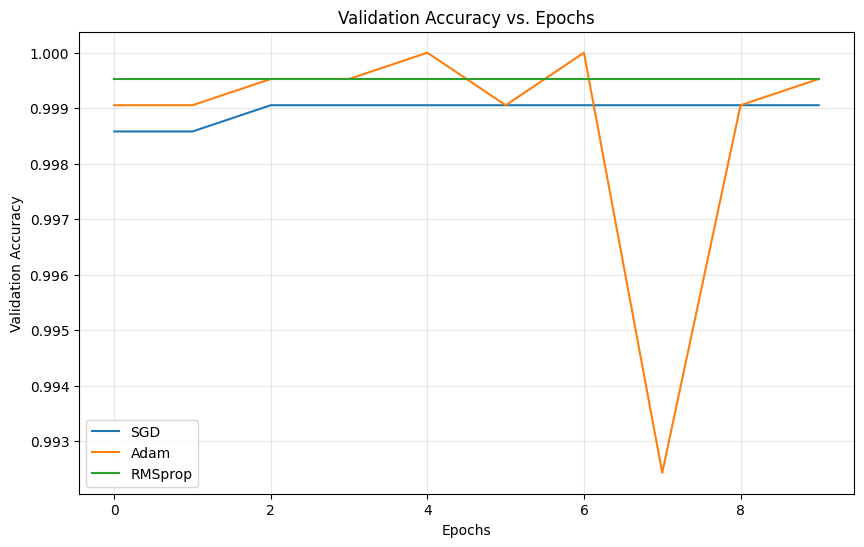

In [5]:
plt.figure(figsize=(10, 6))
for opt_name in optimizers:
    plt.plot(history[opt_name].history['val_accuracy'], label=opt_name)
plt.title("Validation Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
